In [1]:
import pandas as pd
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [2]:
df = pd.concat([df_train.drop(columns=['Survived']),df_test])

In [3]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


<Axes: ylabel='Density'>

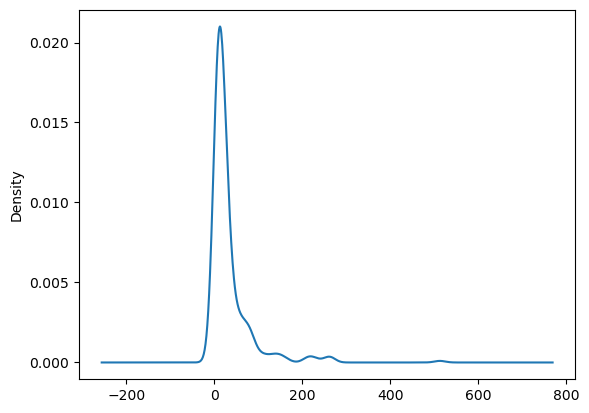

In [4]:
df['Fare'].plot(kind='kde')

In [5]:
df['Fare'].dropna().sample(30).tolist()

[59.4,
 7.75,
 7.925,
 8.05,
 7.775,
 52.0,
 31.275,
 21.075,
 7.75,
 13.5,
 30.0,
 7.8958,
 11.5,
 7.25,
 16.1,
 7.775,
 25.7417,
 7.75,
 7.55,
 10.5,
 16.1,
 13.7917,
 75.25,
 15.5,
 6.45,
 7.125,
 27.7208,
 39.0,
 120.0,
 31.0]

### splitting Fare column into number of sample

In [6]:
1308/30

43.6

In [7]:
samples = []
stds = []
for i in range(44):
    x = df['Fare'].dropna().sample(30).values
    stds.append(x.std())
    samples.append(x.tolist())

In [8]:
len(samples)

44

In [9]:
def count_list(l):
    count = 0
    for e in l:
        if isinstance(e, list):
            count = count + 1 + count_list(e)
    return count

In [10]:
count_list(samples)

44

In [11]:
def count_total(l):
    count = 0
    for i in l:
        count += len(i)
    return count

In [12]:
count_total(samples)

1320

In [13]:
import numpy as np

In [14]:
# convert sample into numpy array
samples = np.array(samples)
samples

array([[ 76.7292,  49.5042,  15.5   , ...,  13.    ,  56.9292,   7.8792],
       [ 42.4   ,  34.375 ,  26.    , ...,  16.1   ,   7.775 ,   7.8958],
       [ 16.1   ,  57.9792,  77.9583, ...,  30.5   ,  26.    ,   0.    ],
       ...,
       [ 25.4667, 211.5   ,  75.25  , ...,  27.75  ,   7.6292,  21.075 ],
       [  7.25  ,   7.2292,   7.225 , ...,  10.5   ,  26.55  , 262.375 ],
       [  9.825 ,  24.15  ,   6.2375, ...,  61.3792,  13.8625,   7.75  ]])

In [15]:
sampling_means = samples.mean(axis=1)

In [16]:
sampling_means

array([37.33167333, 20.08888667, 31.56708   , 29.13291333, 48.24041   ,
       32.00208333, 17.49097   , 19.05083   , 24.88249333, 29.32916333,
       41.65444333, 27.79514   , 33.83944667, 28.94736333, 22.06389   ,
       25.95680333, 20.8325    , 39.59056   , 51.81278   , 44.14      ,
       42.77208333, 31.55972333, 34.40055667, 29.56444333, 28.90041667,
       26.26180667, 33.65472333, 27.66555667, 23.45166   , 27.15680667,
       25.05611   , 24.67458667, 48.32098   , 49.4425    , 38.35319   ,
       33.67332667, 28.01833333, 30.76736333, 33.61111   , 27.43138667,
       32.58486   , 31.20208667, 33.12777667, 23.17444667])

In [17]:
sample_std = np.mean(stds)
sample_std

42.58108340781912

### CI level

In [18]:
lower_limit = sampling_means.mean() - 2.014 * (sample_std/np.sqrt(30))
upper_limit = sampling_means.mean() + 2.014 * (sample_std/np.sqrt(30))

In [19]:
print(f'The range is in between {lower_limit}  {upper_limit}')

The range is in between 15.946731094369232  47.26123542078227


In [20]:
df['Fare'].mean()

33.29547928134557

In [21]:
import seaborn as sns

<Axes: ylabel='Density'>

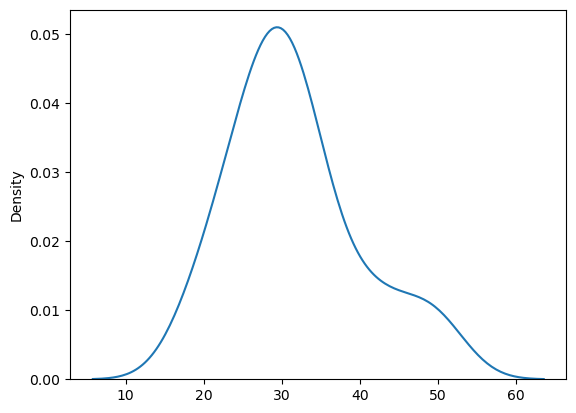

In [22]:
sns.kdeplot(sampling_means)

In [23]:
df['Fare'].std()

51.75866823917414

In [24]:
sampling_means.mean()

31.603983257575752

In [25]:
df['Fare'].mean()

33.29547928134557

In [26]:
46*30

1380

In [27]:
44*30

1320

In [28]:
43*30

1290